# ЛАБОРАТОРНА РОБОТА №1

## Тема: УЗАГАЛЬНЕНИЙ РЯД ФУР’Є ТА СИСТЕМИ БАЗИСНИХ ФУНКЦІЙ

## Мета: Закріпити на практиці поняття узагальненого ряду Фур’є; розглянути розклад різних типів періодичних сигналів в ортонормованих базисах Фур’є та Уолша, використовуючи при цьому можливості пакета MathCAD

*Зробив: Савченко Андрій*

*Виконав: 29.09.2024*

## ВАРІАНТ ЗАВДАНЬ 9 (22)

<img src="Laba1_22.png">

У завданнях A дорівнюватиме 2π

## Порядок виконання роботи

### 1. Згідно із заданим варіантом розглянути періодичний сигнал та розкласти його спочатку: 

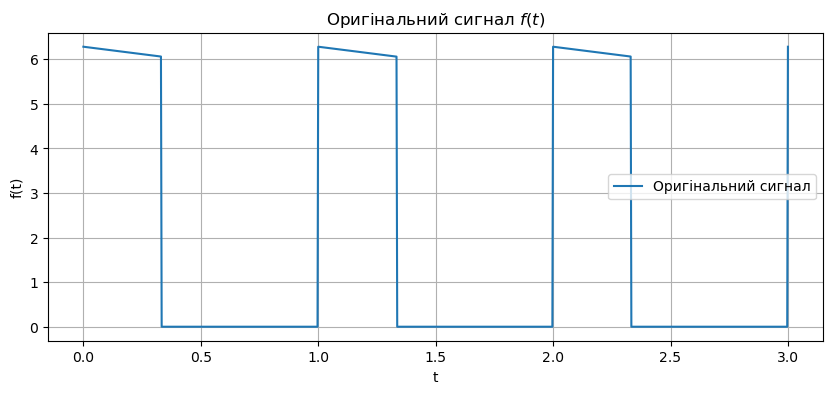

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Параметри
A = 2 * np.pi
T = 1
t1 = T / 3
N = 10  # Кількість гармонік

# Визначення сигнала f(t) як функцію
def f(t):
    if 0 <= t < t1:
        return A - (2 * t / 3)
    else:
        return 0

# Періодичне розширення f(t)
def f_periodic(t):
    return f(t % T)

# Створення зразків часу
t_samples = np.linspace(0, 3 * T, 1000)  # 3 періоди для візуалізації
f_samples = [f_periodic(t) for t in t_samples]

# Побудування вихідного сигналу для візуалізації
plt.figure(figsize=(10, 4))
plt.plot(t_samples, f_samples, label='Оригінальний сигнал')
plt.title("Оригінальний сигнал $f(t)$")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.legend()
plt.show()

### 1.1. У тригонометричний ряд Фур’є, отримавши коефіцієнти ряду a_k та b_k. Виконати синтез сигналу. Побудувати відповідні графіки. 

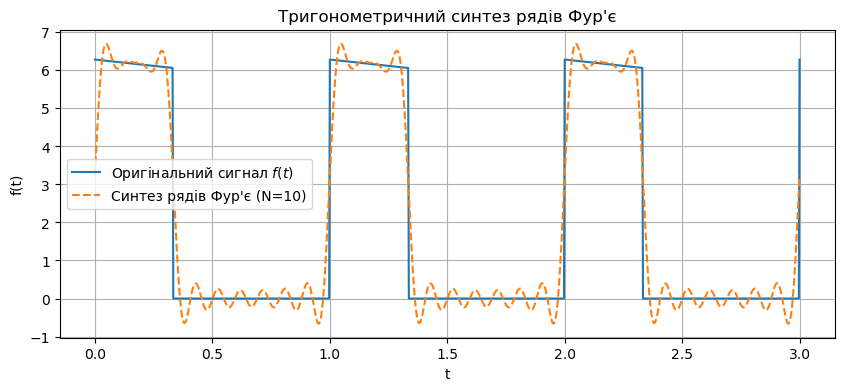

In [5]:
# Визначення коефіцієнтів Фур’є a_k і b_k
def a_k(k):
    result, _ = quad(lambda t: f_periodic(t) * np.cos(2 * np.pi * k * t / T), 0, T)
    return (2 / T) * result

def b_k(k):
    result, _ = quad(lambda t: f_periodic(t) * np.sin(2 * np.pi * k * t / T), 0, T)
    return (2 / T) * result

# Синтез сигналу за допомогою ряду Фур'є з N гармоніками
def fourier_series_trig(t, N):
    a0 = a_k(0) / 2  # Постійний термін
    series = a0
    for k in range(1, N + 1):
        series += a_k(k) * np.cos(2 * np.pi * k * t / T) + b_k(k) * np.sin(2 * np.pi * k * t / T)
    return series

# Створення апроксимацію ряду Фур'є
f_approx_trig = [fourier_series_trig(t, N) for t in t_samples]

# Побудова вихідного та синтезованого сигналу
plt.figure(figsize=(10, 4))
plt.plot(t_samples, f_samples, label="Оригінальний сигнал $f(t)$")
plt.plot(t_samples, f_approx_trig, label=f"Синтез рядів Фур'є (N={N})", linestyle='--')
plt.title("Тригонометричний синтез рядів Фур'є")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.legend()
plt.show()

### 1.2. У тригонометричний ряд Фур’є, отримавши коефіцієнти A_k, φ_k. Побудувати амплітудний та фазовий спектр. Виконати синтез сигналу.

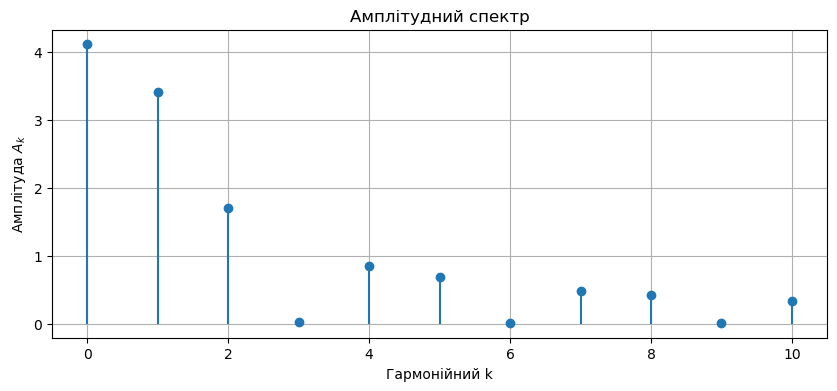

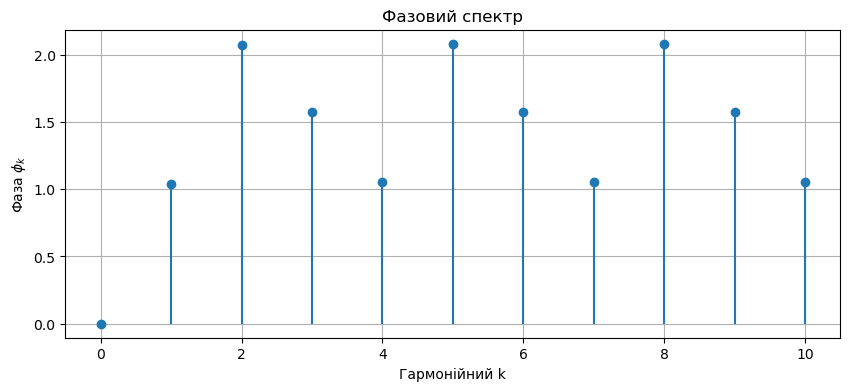

In [7]:
# Обчислення амплітудного і фазового спектру
A_k_values = []
phi_k_values = []

for k in range(N + 1):
    ak = a_k(k)
    bk = b_k(k)
    A_k = np.sqrt(ak**2 + bk**2)
    phi_k = np.arctan2(bk, ak)
    A_k_values.append(A_k)
    phi_k_values.append(phi_k)

# Побудування амплітудного спектру
plt.figure(figsize=(10, 4))
plt.stem(range(N + 1), A_k_values, basefmt=" ")
plt.title("Амплітудний спектр")
plt.xlabel("Гармонійний k")
plt.ylabel("Амплітуда $A_k$")
plt.grid(True)
plt.show()

# Побудання фазового спектру
plt.figure(figsize=(10, 4))
plt.stem(range(N + 1), phi_k_values, basefmt=" ")
plt.title("Фазовий спектр")
plt.xlabel("Гармонійний k")
plt.ylabel("Фаза $\phi_k$")
plt.grid(True)
plt.show()

### 1.3. У комплексний ряд Фур’є. Побудувати амплітудний та фазовий спектри. Виконати синтез сигналу.

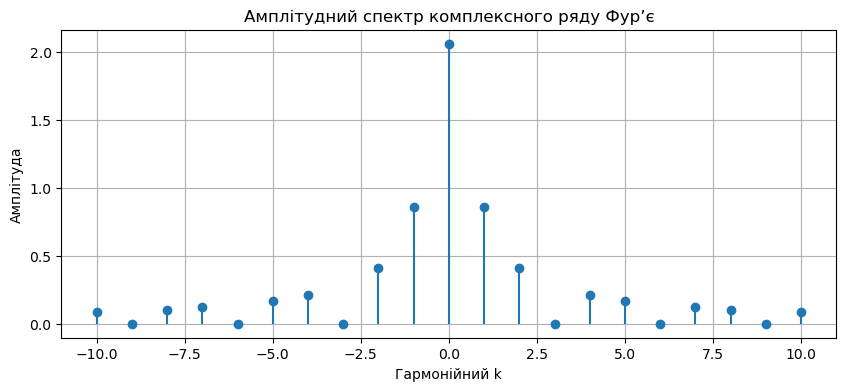

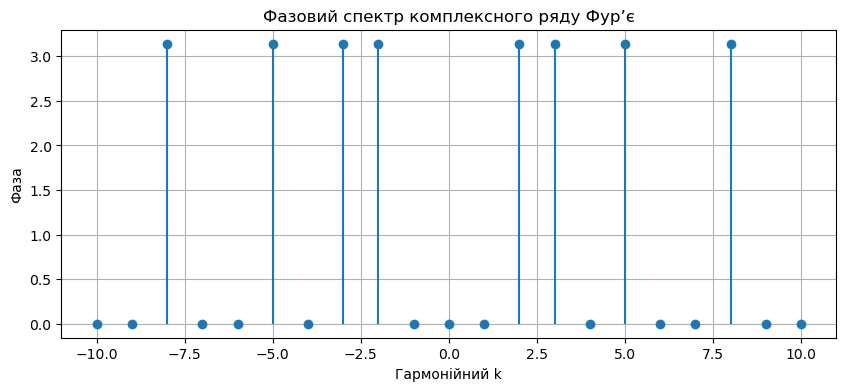

In [9]:
# Комплексні коефіцієнти рядів Фур'є
def c_k(k):
    result, _ = quad(lambda t: f_periodic(t) * np.exp(-2j * np.pi * k * t / T), 0, T)
    return (1 / T) * result

# Створення амплітудних і фазових спектрів
c_k_values = [c_k(k) for k in range(-N, N + 1)]
amplitude_spectrum = [abs(ck) for ck in c_k_values]
phase_spectrum = [np.angle(ck) for ck in c_k_values]

# Побудування амплітудного спектру
plt.figure(figsize=(10, 4))
plt.stem(range(-N, N + 1), amplitude_spectrum, basefmt=" ")
plt.title("Амплітудний спектр комплексного ряду Фур’є")
plt.xlabel("Гармонійний k")
plt.ylabel("Амплітуда")
plt.grid(True)
plt.show()

# Побудування фазового спектру
plt.figure(figsize=(10, 4))
plt.stem(range(-N, N + 1), phase_spectrum, basefmt=" ")
plt.title("Фазовий спектр комплексного ряду Фур’є")
plt.xlabel("Гармонійний k")
plt.ylabel("Фаза")
plt.grid(True)
plt.show()

### 1.4. У ряд Фур’є за системою базисних функцій Уолша-Пелі.

In [13]:
from scipy.linalg import hadamard

# Визначення базисних функцій Уолша-Пейлі (Уолша).
def walsh_basis(N, t, T=1):
    """Generate the N-th Walsh basis function value at time t."""
    # Використання матриці Адамара для створення функцій Уолша (для T=1 базис масштабується)
    H = hadamard(N)
    normalized_t = (t / T) % 1  # Нормалізування t до [0, 1] інтервалу
    index = int(normalized_t * N)  # Відобразення нормалізованого часу на дискретний індекс
    return H[:, index % N]

# Обчислення коефіцієнту Уолша, проектування f(t) на кожну базисну функцію Уолша
def walsh_coefficients(num_terms, T=1):
    """Обчислення коефіцієнту ряду Уолша для заданої кількості доданків."""
    coeffs = []
    for n in range(num_terms):
        # Інтегрувати f(t) * walsh_basis(n, t) на інтервалі [0, T]
        result, _ = quad(lambda t: f_periodic(t) * walsh_basis(num_terms, t, T)[n], 0, T)
        coeffs.append((2 / T) * result)  # Коефіцієнт масштабування для відповідності ортонормальності Уолша
    return coeffs

# Кількість членів Уолша (гармонік)
num_terms = N  

# Обчислення коефіцієнти Уолша
walsh_coeffs = walsh_coefficients(num_terms)

# Синтезування сигналу за допомогою ряду Уолша
def walsh_series_synthesis(t, walsh_coeffs, T=1):
    """Синтезування сигналу у момент часу t за допомогою ряду Уолша з обчисленими коефіцієнтами."""
    synthesis = 0
    for n, coeff in enumerate(walsh_coeffs):
        synthesis += coeff * walsh_basis(num_terms, t, T)[n]
    return synthesis

# Генерування синтезованого сигналу за допомогою базису Уолша
f_approx_walsh = [walsh_series_synthesis(t, walsh_coeffs) for t in t_samples]

# Побудування вихідниго сигналу і наближення синтезу Уолша
plt.figure(figsize=(10, 4))
plt.plot(t_samples, f_samples, label="Оригінальний сигнал $f(t)$")
plt.plot(t_samples, f_approx_walsh, label="Синтез серії Уолша (N={})".format(num_terms), linestyle='--')
plt.title("Синтез основи Уолша-Пелі")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.legend()
plt.show()

ValueError: n must be an positive integer, and n must be a power of 2

### 1.5. Кількість гармонік: N=8-10. Побудувати відповідний спектр сигналу. Виконати синтез сигналу.

### 2. Синтезувати ( відновити) сигнали у кожному базисі. Зобразити на одному графіку вихідний сигнал, синтезований за допомогою тригонометричного ряду Фур’є та синтезований за допомогою базису Уолша-Пелі.

NameError: name 'f_approx_walsh' is not defined

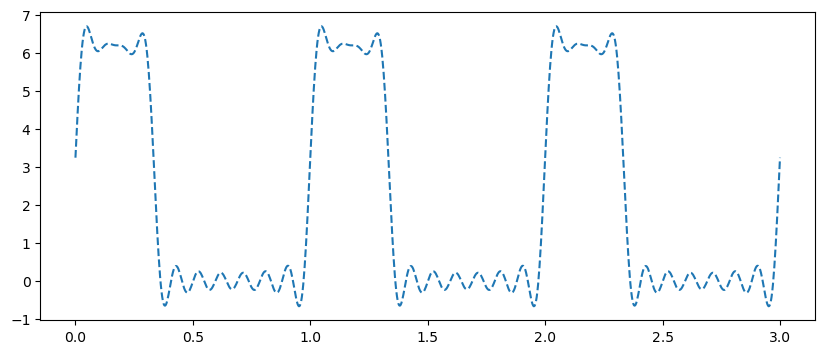

In [14]:
# `f_approx_walsh` містить результат синтезу ряду Уолша-Пелі
plt.figure(figsize=(10, 4))
plt.plot(t_samples, f_approx_trig, label="Тригонометричний синтез Фур'є", linestyle='--')
plt.plot(t_samples, f_approx_walsh, label="Синтез Уолша-Пелі", linestyle='-.')
plt.title("Порівняння синтезу - Фур'є проти Уолша-Пелі")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.legend()
plt.show()

### 3. Обчислити норму похибки апроксимації для кожного з базисів для одного й того самого значення N. Зробити висновки щодо якості апроксимації кожним з методів

In [15]:
# Розрахування норми похибок для синтезу Фур’є та Уолша-Пелі
error_trig = np.linalg.norm(np.array(f_samples) - np.array(f_approx_trig))
error_walsh = np.linalg.norm(np.array(f_samples) - np.array(f_approx_walsh))

print(f"Помилка апроксимації (ряд Фур'є): {error_trig}")
print(f"Помилка апроксимації (ряд Уолша-Пелі): {error_walsh}")

NameError: name 'f_approx_walsh' is not defined